In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

In [3]:
confirmed = pd.read_csv(r'covid19_confirmed_global.csv')
deaths = pd.read_csv(r'covid19_deaths_global.csv')
recorvered = pd.read_csv(r'covid19_recovered_global.csv')

In [4]:
# dropping the selected columns

confirmed = confirmed.drop(['Province','Lat','Long'], axis=1)
deaths = deaths.drop(['Province','Lat','Long'], axis=1)
recorvered = recorvered.drop(['Province','Lat','Long'], axis=1)

In [ ]:
confirmed.isnull().sum()

In [5]:
len(confirmed['Country'].unique())

195

In [6]:
confirmed = confirmed.groupby(confirmed['Country']).aggregate('sum')
deaths = deaths.groupby(deaths['Country']).aggregate('sum')
recorvered = recorvered.groupby(recorvered['Country']).aggregate('sum')

In [7]:
confirmed = confirmed.T
deaths = deaths.T
recorvered = recorvered.T

In [8]:
new_cases = confirmed.copy()

In [9]:
# calculating daily cases
for day in range(1,len(confirmed)):
    new_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]

In [10]:
growth_rate = confirmed.copy()

In [11]:
# calculating the growth rate
for day in range(1,len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day-1]) * 100

In [12]:
active_cases = confirmed.copy()

In [13]:
for day in range(0, len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recorvered.iloc[day]

In [14]:
actual_growth_rate = confirmed.copy()

In [15]:
for day in range(1,len(confirmed)):
    actual_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day - 1]) / active_cases.iloc[day - 1]) * 100

In [66]:
actual_growth_rate['US'].tail(10)

6/23/2021    0.036590
6/24/2021    0.037874
6/25/2021    0.070382
6/26/2021    0.021678
6/27/2021    0.011648
6/28/2021    0.045222
6/29/2021    0.034099
6/30/2021    0.038224
7/1/2021     0.042825
7/2/2021     0.088265
Name: US, dtype: float64

In [16]:
death_rate = confirmed.copy()

In [17]:
# death_rate calculation
for day in range(0, len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100


In [18]:
hospitalisation_rate = 0.05

In [19]:
hospitalisation_needed = confirmed.copy()

In [20]:
for day in range(0, len(confirmed)):
    hospitalisation_needed.iloc[day] = active_cases.iloc[day] * hospitalisation_rate

In [21]:
# visualisation

countries = ['Italy', 'Austria', 'US', 'China', 'India', 'France', 'Spain']

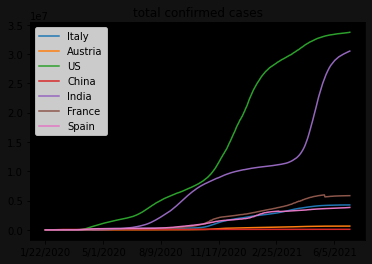

In [26]:
ax=plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', )
ax.tick_params(axis='y')
ax.set_title('total confirmed cases')


for country in countries:
    confirmed[country].plot(label=country)
plt.legend(loc='upper left')
plt.show()

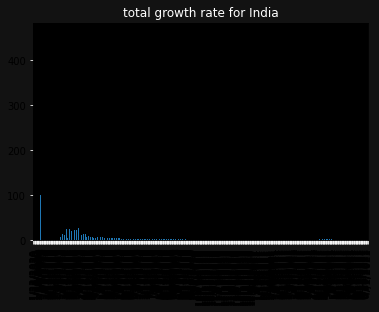

In [31]:
# growth rate

countries = ['India']

for country in countries:
    ax=plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', color='white' )
    ax.tick_params(axis='y', color='white')
    ax.set_title(f'total growth rate for {country}',color='white')
    growth_rate[country].plot.bar()
    # plt.legend(loc='upper left')
    plt.show()